# Kmeans Uygulaması

## Data İnceleme

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

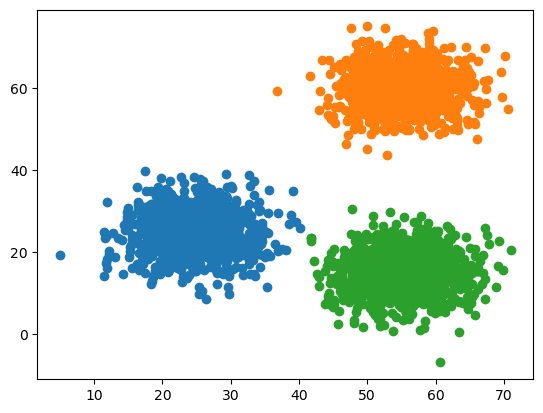

In [2]:
# %% datamızı kendimiz oluşturalım

# class1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

# class2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# class3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3),axis = 0)
y = np.concatenate((y1,y2,y3),axis = 0)

dictionary = {"x":x,"y":y}

data = pd.DataFrame(dictionary)

plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()



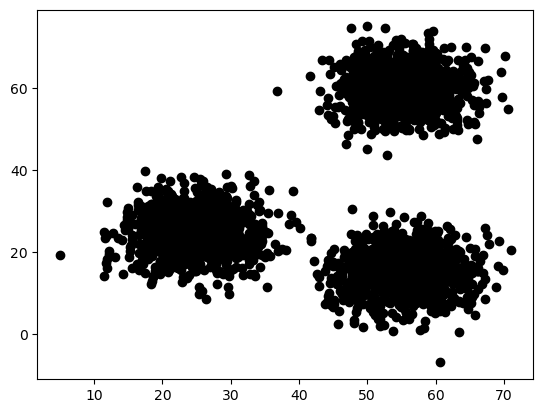

In [3]:
# %% kmeans algoritması bunu gorecek
plt.scatter(x1,y1,color = "black")
plt.scatter(x2,y2,color = "black")
plt.scatter(x3,y3,color = "black")
plt.show()

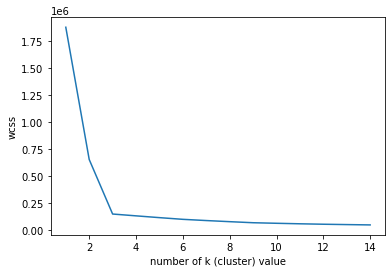

In [14]:
# %% KMEANS

from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

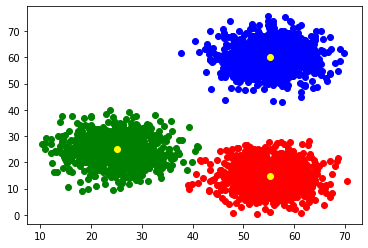

In [19]:
#%% k = 3 icin modelim

kmeans2 = KMeans(n_clusters=3)
clusters = kmeans2.fit_predict(data)


data["label"] = clusters

plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow")
plt.show()




In [18]:
data.tail(20)

,x,y,label
2980,57.945812,27.157891,0
2981,56.296543,19.241938,0
2982,59.643398,13.550279,0
2983,68.461372,20.378364,0
2984,61.967330,20.549740,0
2985,53.677429,13.706832,0
2986,57.319035,20.227401,0
2987,56.760885,9.802855,0
2988,56.403686,14.710570,0
2989,49.585849,14.283157,0


In [ ]:
# Kmeans uygulama with make_blobs

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs

# Create a dataset of 2D distributions
centers = 3
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
data = pd.DataFrame(X_train)
data['Clusters'] = true_labels
data

,0,1,Clusters
0,-1.257301,-1.524866,2
1,1.499872,-0.113177,1
2,-0.264088,1.248653,0
3,1.623146,-0.139594,1
4,-1.005307,-1.204185,2
...,...,...,...
95,-0.307486,1.259331,0
96,0.049806,1.308709,0
97,1.295946,0.139414,1
98,-0.853584,-1.128015,2


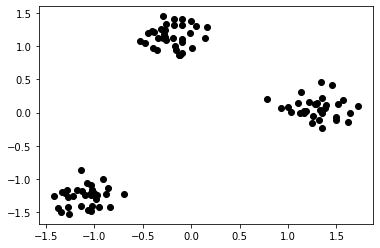

In [21]:
# Show data 
plt.scatter(data[0],data[1],color="black")

In [22]:
# Fit model
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)

KMeans(n_clusters=3)

In [24]:
classification = kmeans.predict(X_train)
class_centers = kmeans.labels_


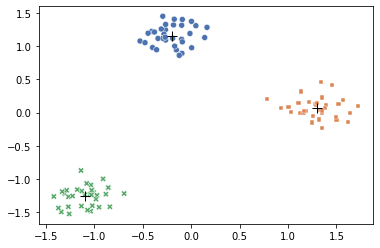

In [26]:
# View results
import seaborn as sns
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.cluster_centers_],
         [y for _, y in kmeans.cluster_centers_],
         'k+',
         markersize=10,
         )
plt.show()